In [24]:
#standard packages
import pandas as pd
import numpy as np
import sklearn.datasets

#preprocessing
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


#results analysis
from sklearn.metrics import confusion_matrix, precision_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

#pipeline
from sklearn.pipeline import Pipeline

#visualize
from sklearn.datasets import load_boston

from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

# LOADING DATAFRAMES

# from sklearn import datasets
# boston_data = datasets.load_boston()
# df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
# df['target'] = pd.Series(boston_data.target)

df = pd.read_csv('avocado.csv')

In [25]:
#preprocessing and encoding columns

# numeric_features = ['duration',
#                     'credit_amount',
#                     'installment_commitment',
#                     'residence_since',
#                     'age',
#                     'existing_credits',
#                     'num_dependents']
# categorical_features = ['checking_status',
#                        'credit_history',
#                        'purpose',
#                        'savings_status',
#                       'employment',
#                       'personal_status',
#                       'other_parties',
#                        'property_magnitude',
#                        'other_payment_plans',
#                       'housing',
#                       'job',
#                       'own_telephone',
#                       'foreign_worker']


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Need to find a way to use this to reduce dimensionality and improve speed:
#         ('reduce_dims', PCA(n_components=4))





preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', categorical_transformer, selector(dtype_include="object"))
])

# TESTING

In [26]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
#check for missing values
df.isnull().sum(axis = 0)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [28]:
# Drop un-needed columns
df = df.drop(columns=['Unnamed: 0','Date','region'])

In [29]:
df.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64

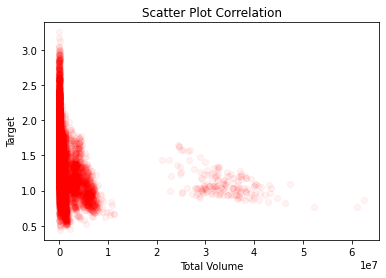

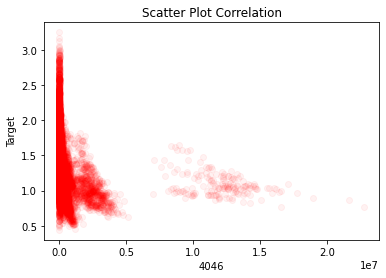

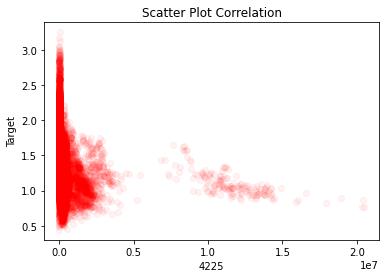

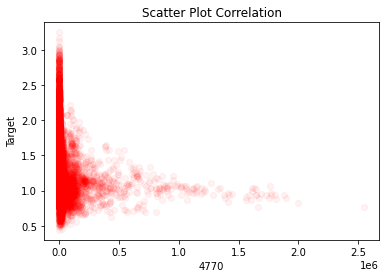

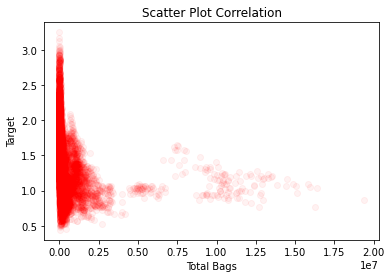

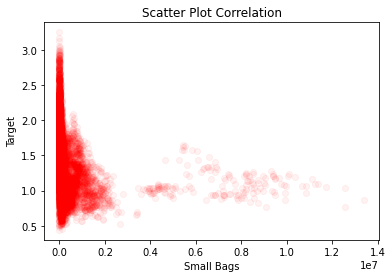

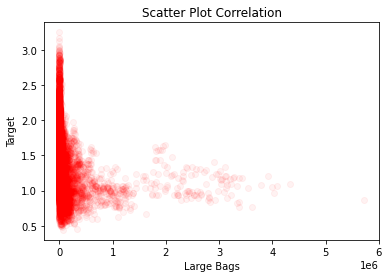

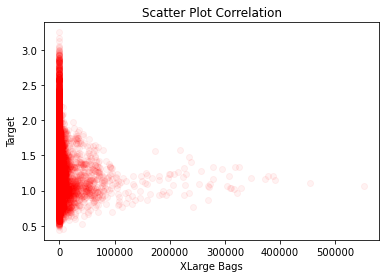

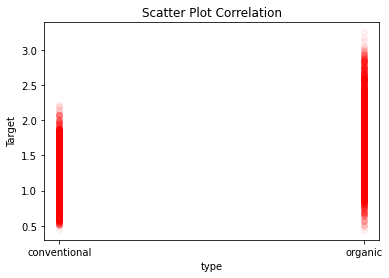

In [30]:
for column_number in range (1,10):
#     plt.yticks(ticks=[0,1])
    plt.title('Scatter Plot Correlation')
    plt.xlabel(df.columns[column_number])
    plt.ylabel("Target")
    plt.scatter(df.iloc[:,column_number],df.iloc[:,0], color='red', alpha=0.05)
    plt.show()

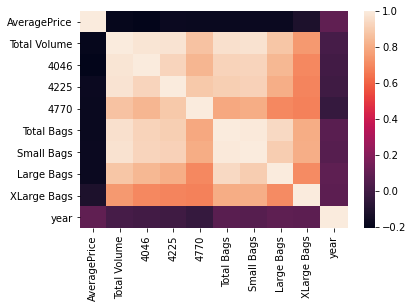

In [31]:
sns.heatmap(data= df.corr())

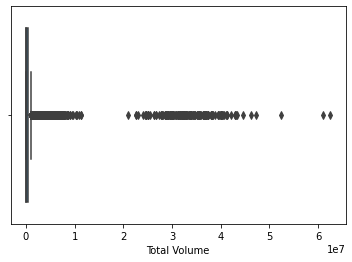

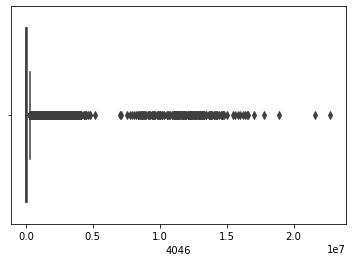

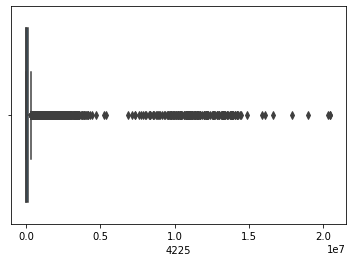

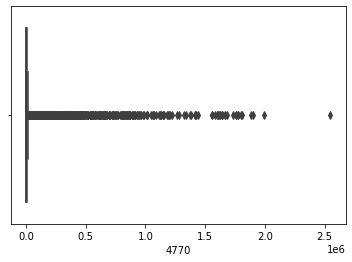

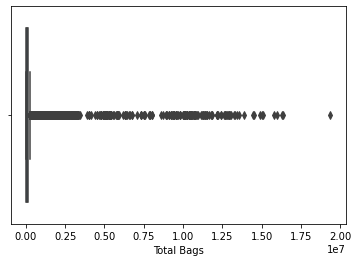

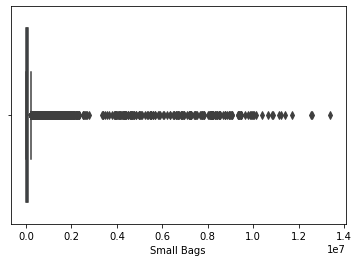

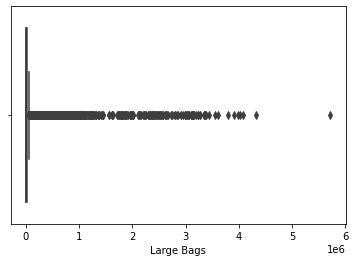

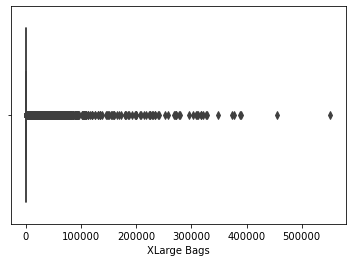

TypeError: unsupported operand type(s) for /: 'str' and 'int'

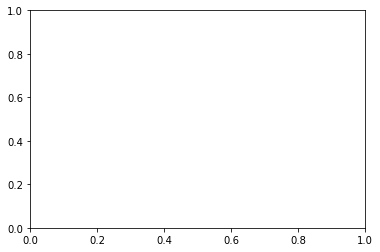

In [32]:
for column_number in range (1,10):
    sns.boxplot(x=df.columns[column_number], data= df)
    plt.show()

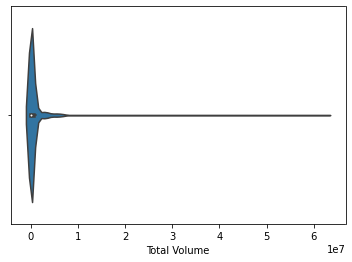

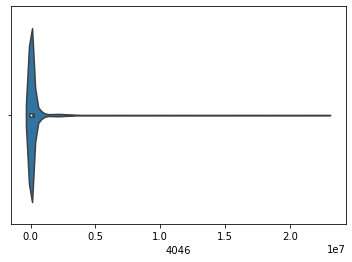

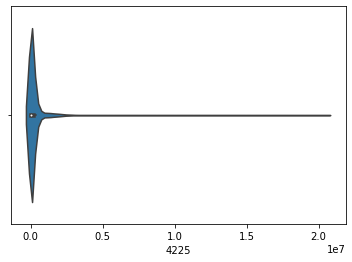

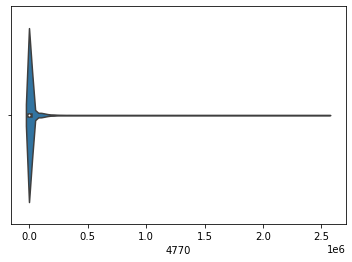

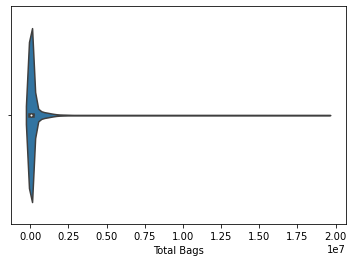

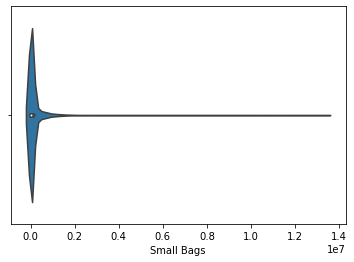

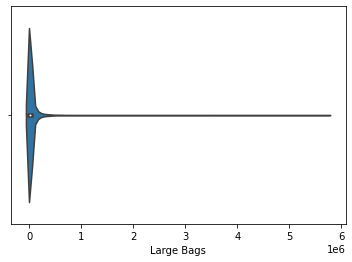

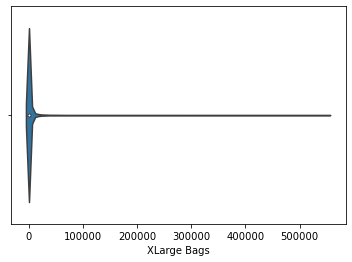

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [33]:
for column_number in range (1,10):
    sns.violinplot(x=df.columns[column_number], data= df)
    plt.show()

In [ ]:
df['AveragePrice'] = LabelEncoder().fit_transform(df['AveragePrice'])
df

In [34]:
df.corr(method='pearson')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [35]:
y = df.iloc[:, 0:1]

X = df.drop('AveragePrice',axis='columns')
X = X.iloc[:,:]
print(X)
X.info

# target_feature = ['diagnosis']

#Find the columns that have the most correlation to target
subset_feature = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']

X = X[subset_feature]
X.info()

       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags          type  year  
0           93.25          0.0  conventional  

In [36]:
y.info

<bound method DataFrame.info of        AveragePrice
0              1.33
1              1.35
2              0.93
3              1.08
4              1.28
...             ...
18244          1.63
18245          1.71
18246          1.87
18247          1.93
18248          1.62

[18249 rows x 1 columns]>

In [62]:
#Pipeline

# MODEL TYPES

# KNeighborsClassifier(n_neighbors=10, p=2)

# LogisticRegression(solver=lbfgs, C=C)
#     solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

# SVC(kernel='linear', C=C)
#     kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’)
#     degreeint, default=3 (for poly only)

# RandomForestClassifier(n_estimators=100, criterion='gini')
# DecisionTreeClassifier(criterion='gini', splitter='best')

# DecisionTreeRegressor(criterion='mse')
# RandomForestRegressor(n_estimators=10, criterion=’mse’)

# KNeighborsRegressor(n_neighbors=3)

K=1
for K in range(1,10):
    resultslist = []
    for i in range(1,50):
    
        model_choice = KNeighborsRegressor(n_neighbors=K)

        clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', model_choice)])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

# FOR CLASSIFICATION ONLY
# cross_val_score(clf, X, y, scoring='accuracy').mean()
# conf = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix')
# print(conf)

# param_grid = dict(classifier__algorithm=['auto','ball_tree','kd_tree','brute']
#                   ,classifier__n_neighbors=[1,2,3,4,5,6,7,8,9,10]
#                  )
# # For future use - try using with PCA above
# #     reduce_dims__n_components=[4,6,8]

# grid = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=1, verbose=10, scoring= 'accuracy', return_train_score=True)
# grid.fit(X, y)
# print('Grid Best Score')
# print(grid.best_score_)
# grid.cv_results_

# FOR REGRESSION ONLY (calculate R score)
        resultslist.append(clf.score(X_test, y_test))
    print("Average model score: %.5f" % np.mean(resultslist))
    print(K)
#         print("Current model score: %.5f" % clf.score(X_test, y_test))



Average model score: 0.64036
1
Average model score: 0.71412
2
Average model score: 0.73344
3
Average model score: 0.73466
4
Average model score: 0.73469
5
Average model score: 0.73528
6
Average model score: 0.73201
7
Average model score: 0.72896
8
Average model score: 0.72582
9


In [ ]:
# KNN = 6, 73.528% accuracy